In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('F:/Projects/housing_price_dataset.csv')

In [3]:
df.head(10)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
5,2095,2,3,Suburb,2020,198208.803907
6,2724,2,1,Suburb,1993,343429.319110
7,2044,4,3,Rural,1957,184992.321268
8,2638,4,3,Urban,1959,377998.588152
9,1121,5,2,Urban,2004,95961.926014


In [5]:
df['Price'] = df['Price'].round(2)

In [6]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_clean = df[(df['Price'] >= lower) & (df['Price'] <= upper)]

In [7]:
df_clean.shape

(49941, 6)

In [8]:
X = df_clean.drop(['Price','Neighborhood','YearBuilt'], axis =1)

In [11]:
y = df_clean['Price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X_test_scaled)

In [20]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


RMSE: 49683.23597693808
R²: 0.5668480762603036


In [21]:
baseline_pred = y_train.mean()
baseline_rmse = np.sqrt(mean_squared_error(
    y_test, [baseline_pred] * len(y_test)
))

print("Baseline RMSE:", baseline_rmse)


Baseline RMSE: 75506.2230530413


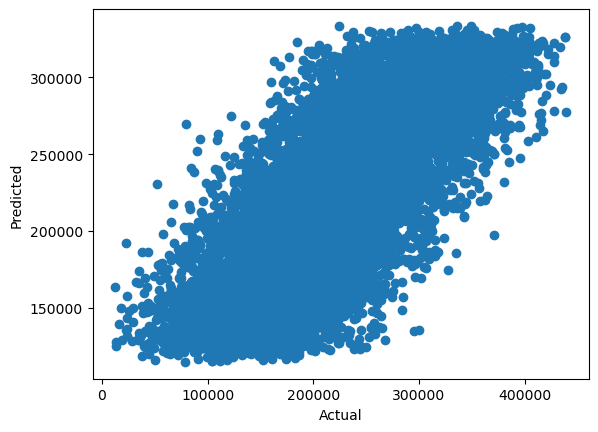

In [22]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


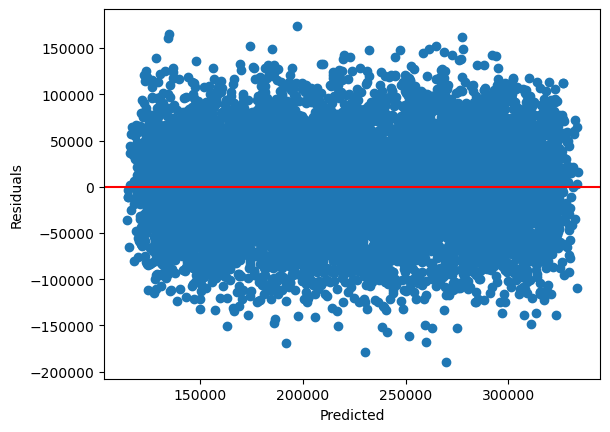

In [23]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


In [24]:
residuals

40554    -15357.120227
25119     24043.045073
25049      3961.319112
29212     35425.939274
14188    -33574.166727
             ...      
43683    104782.339309
31522    -30426.629598
14791    -30994.230547
26847    -49990.462032
33051     43473.411737
Name: Price, Length: 9989, dtype: float64